# Introduction to GPT-2 Version 2
by Eugenio Tufino, University of Padova, 20 December, 2024

[Link to Google Colab](https://colab.research.google.com/drive/1pq0Yo2QPxMTR_OpRy81T4sEFOpfNqyIA?usp=sharing)

In this notebook, we present GPT-2, a simplified model compared to the state-of-the-art generative models such as  GPT-4 or OpenAI o1, the model just released. GPT-2 is based on the **Generative Pre-trained Transformer** architecture and was released by OpenAI in **2019**. It uses a relatively simple mechanism to generate text, predicting the next word in a sequence based on the given context.

Therefore unlike Word2Vec, where as we have seen word vectors are static (the same vector represents a word regardless of its usage), GPT-2 **dynamically adjusts the word representation** based on its context. This allows GPT-2 to better capture the meaning of words in different situations, resulting in more coherent and contextually accurate text generation.

We will explore this model to understand, in a simplified way, how this kind of generative AI works, focusing on its word generation process and how prompts affect its output.

---


GPT stands for Generative Pre-trained Transformer, highlighting its key features:
- Generative: The model generates coherent and meaningful text.
- Pre-trained: It is trained on large datasets before being fine-tuned for specific tasks.
- Transformer: It uses the Transformer architecture for efficient and context-aware text generation.


Further reading:
1. https://en.wikipedia.org/wiki/GPT-2
2. https://huggingface.co/docs/transformers/en/model_doc/gpt2
3. The Transformer architecture was introduced here: Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., & Polosukhin, I. (2017). "Attention Is All You Need." Advances in Neural Information Processing Systems
4.. https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/





### Import the libraries for using GPT-2


In [ ]:
!pip install transformers
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

In [ ]:
# Load the pre-trained GPT-2 model and tokenizer
#model_name = "gpt2"  # This is the smallest size. You can also use 'gpt2-medium', 'gpt2-large'.
model_name = "gpt2-large"  # This is the smallest size. You can also use 'gpt2-medium', 'gpt2-large'.

# The tokenizer processes input text into tokens and converts tokens back to text

tokenizer = GPT2Tokenizer.from_pretrained(model_name) # Load the pre-trained tokenizer for GPT-2
# The tokenizer processes input text into tokens and converts tokens back to text
#Load the pre-trained GPT-2 language model
# The model generates text by predicting the next token in a sequence
model = GPT2LMHeadModel.from_pretrained(model_name)

print("GPT-2 model and tokenizer loaded successfully!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT-2 model and tokenizer loaded successfully!


### What does a 'tokenizer' mean, and what is a token?
Check this website (for the latest version of GPT): [Link](https://platform.openai.com/tokenizer)

Try to tokenize the following text:

In [ ]:
# Text to tokenize
text = "What is AI?"
# Convert text into tokens
tokenized_text = tokenizer.tokenize(text)
# Ġ simply indicates a space precedes the token
print("Tokenized text:", tokenized_text)
tokens = tokenizer.encode(text, return_tensors="pt")
# Output the tokens
print(tokens)  #print the token Ids

Tokenized text: ['What', 'Ġis', 'ĠAI', '?']
tensor([[2061,  318, 9552,   30]])


### Info about the model GPT-2



In [ ]:
# Check vocabulary size and vector size from the model's configuration
vocab_size = model.config.vocab_size
vector_size = model.config.n_embd

print("Vocabulary size:", vocab_size)
print("Vector size (number of dimensions):", vector_size)


Vocabulary size: 50257
Vector size (number of dimensions): 1280


## Generating text with GPT-2

In [ ]:

#prompt = "The importance of communication in modern society"

# Define a physics-related prompt
#prompt="In physics, Newton's laws describe the relationship between motion and forces"
#prompt = "In physics, energy is the ability to"
#prompt="In classical mechanics, Newton's First Law states that..."
#prompt="In physics, the speed of light"
prompt="The theory of relativity, proposed by Albert Einstein, revolutionized our understanding of space and time."


In [ ]:
# Tokenize the prompt
input_ids = tokenizer.encode(prompt, return_tensors='pt')
# Create an attention mask
attention_mask = torch.ones_like(input_ids)

output = model.generate(
    input_ids,
    attention_mask=attention_mask,  # Specify the attention mask
    max_length=80,#Maximum length of the generated sequence
    num_return_sequences=1,# Number of different sequences to generate
    no_repeat_ngram_size=3,  # # Avoids repeated bigrams, see Annex A
    temperature=0.8,
    top_k=50, #Limits sampling to the top 50 tokens by probability, reducing unlikely choices
    top_p=0.95,# Enables nucleus sampling, selecting tokens with cumulative probability ≤ 0.95
    do_sample=True,  # Enable sampling
    pad_token_id=tokenizer.eos_token_id,
)
# Decode and print the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Text:")
print(generated_text)


Generated Text:
The theory of relativity, proposed by Albert Einstein, revolutionized our understanding of space and time. It was the first time in history that a physical law had been proven to be true beyond reasonable doubt.

After the death of Einstein, there were several theories that proposed a non-Einsteinian solution to the problem of gravity.
 and the theory of supersymmetry proposed by the theorists of


In a previous session (with GPT-2 small model) I obtained the following text:
> In physics, energy is the ability to move matter in the universe. This is why the earth is flat. But the way the world works is different.The earth orbits the sun, which is a reflection of the moon, and then it turns around and turns the other way around. The solar system's rotation slows down when the Earth spins, so the solar wind is pulled in two directions. It takes a lot of energy to turn the two sides of a circle around each other...



## Questions
1. How coherent is the generated text with the given prompt?
2. Does the model truly understand the concepts, or is it merely generating plausible sentences?


GPT-2 generates text dynamically by predicting the next word in a sequence based on its context (through the Transformer architecture). It can produce  produce nonsensical or inaccurate content.


### Parameter you can vary to improve the generated text:
**temperature:** Controls the randomness of text generation. A lower value produces more predictable text, while a higher value increases creativity.
**max_length**: Adjusts the length of the generated text.
**top_k:** Regulate the selection of probable words at each step.

(see also Annex A below)

**Exercise 1** Adjust the temperature. Experiment with different calues of temperature to improve the quality of GPT-2’s generated output. Observe how it influences the behavior of the model.

 Which temperature value produces the most meaningful text for your physics context? Write down the produced output too.

**Exercise 2**  Try the exercise again with a more physics-specific prompt. Report here the prompt and the output with the choice of parameters made.


### Analyze the probabilities for the next token.
This allows us to 'look under the hood' and understand how the model assigns probabilities to different options. We can read the probabilities of the next word after the given prompt.

prompt = ""The importance of communication in modern society""

In [ ]:
import torch.nn.functional as F
# Define a prompt
prompt = "The importance of communication in modern society"
#physics related prompt = "The speed of light"

# Encode the prompt
input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Forward pass through the model to get logits
outputs = model(input_ids)
logits = outputs.logits  # Shape: (batch_size, sequence_length, vocab_size)

# Get the logits for the last token in the input
last_token_logits = logits[0, -1, :]  # Shape: (vocab_size,)

# Set the temperature
temperature = 0.8 # Lower = less random, higher = more random/creative

adjusted_logits = last_token_logits / temperature
probs = F.softmax(adjusted_logits, dim=-1)

# We set top_k=30 to show the 30 most probable options for the next token
top_k = 30
top_k_probs, top_k_indices = torch.topk(probs, top_k)

print("The top {} most probable options for the next token are:\n".format(top_k))
# Decode and print the top words with their probabilities
for i in range(top_k):
    word = tokenizer.decode(top_k_indices[i].item())
    prob = top_k_probs[i].item()
    print(f"{word}: {prob:.4f}")



The top 30 most probable options for the next token are:

 is: 0.5016
 has: 0.1569
 cannot: 0.1046
 can: 0.0363
,: 0.0346
 was: 0.0307

: 0.0235
 and: 0.0219
.: 0.0167
 should: 0.0064
 must: 0.0051
 goes: 0.0051
 lies: 0.0028
 may: 0.0024
 will: 0.0021
 requires: 0.0018
 does: 0.0018
 remains: 0.0016
 makes: 0.0014
 as: 0.0014
 means: 0.0014
 in: 0.0012
:: 0.0012
 seems: 0.0011
 would: 0.0011
 (: 0.0010
 could: 0.0010
 continues: 0.0009
 became: 0.0009
 comes: 0.0009


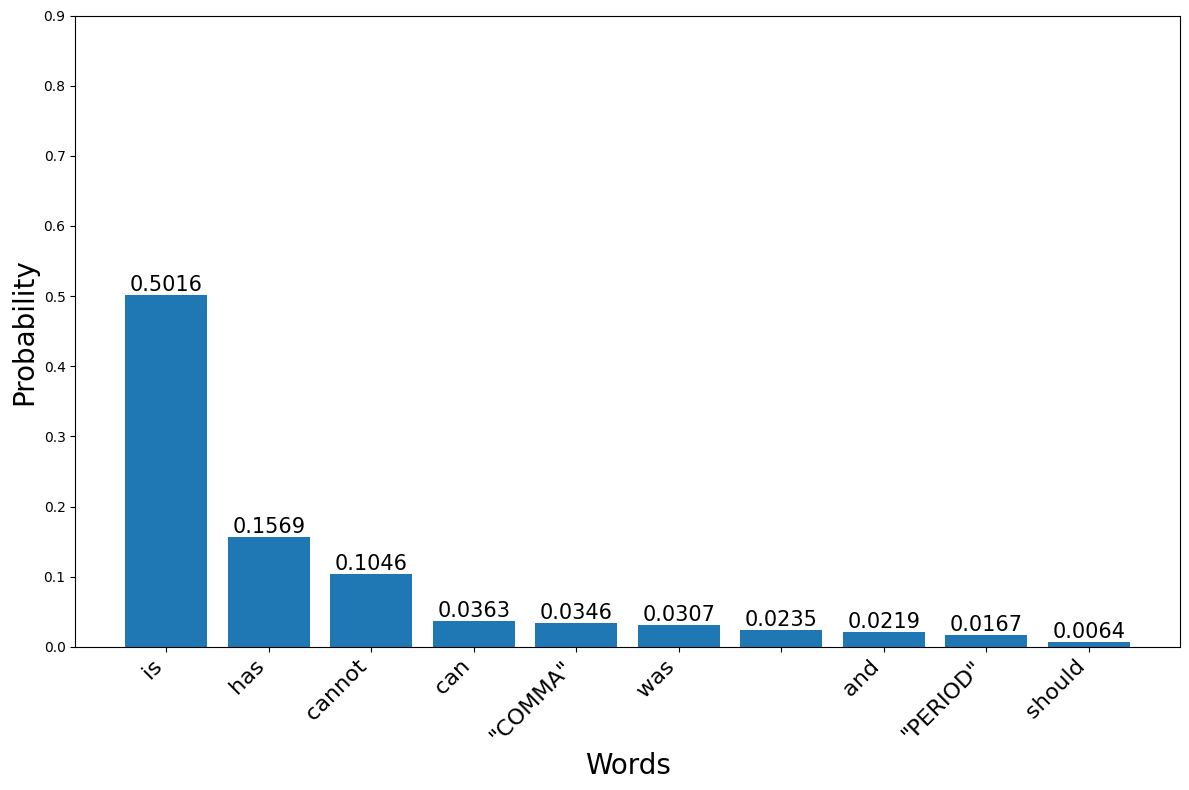

In [ ]:


# Decode the words and limit to top 10
words = [tokenizer.decode(idx.item()) for idx in top_k_indices[:10]]
probs = top_k_probs[:10].tolist()

# Make punctuation more readable
words = ['"COMMA"' if w == ',' else '"PERIOD"' if w == '.' else w for w in words]

# Create the histogram
plt.figure(figsize=(12, 8))  # Increased figure size
plt.bar(range(len(words)), probs, align='center')
plt.xticks(range(len(words)), words, rotation=45, ha='right', fontsize=16)  # Increased font size
plt.xlabel('Words', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.ylim(0.0, 0.9)
#plt.title('Probabilities of the 10 Most Likely Next Words', fontsize=16)

# Add values above each bar
for i, v in enumerate(probs):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=15)

plt.savefig('Hist_T0.8.png', dpi=400)
plt.tight_layout()
plt.show()

**Exercise 2:** Try to change the "temperature" parameter and see if there are any differences

**Exercise 3:** You can continue the construction of the sentence, word by word...

### Iterating the process
Iterate the process changing only the temperature, the max_words and top_k parameters.

In [ ]:
# @title Testo del titolo predefinito

input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Set parameters
max_words = 100  # Maximum number of words to generate
temperature = 0.7
top_k = 50

# Generate word by word
for _ in range(max_words):
    # Forward pass to get logits
    outputs = model(input_ids)
    logits = outputs.logits  # Shape: (batch_size, sequence_length, vocab_size)

    # Get the logits for the last token
    last_token_logits = logits[0, -1, :]

    # Apply temperature
    adjusted_logits = last_token_logits / temperature

    # Convert logits to probabilities
    probs = F.softmax(adjusted_logits, dim=-1)

    # Sample the next token
    next_token_id = torch.multinomial(probs, num_samples=1)

    # Append the token to the input_ids
    input_ids = torch.cat([input_ids, next_token_id.unsqueeze(0)], dim=1)

    # Decode the current output and print
    generated_text = tokenizer.decode(input_ids[0])
    print(generated_text)

# Final generated paragraph
print("\nFinal Generated Paragraph:")
print(tokenizer.decode(input_ids[0]))


The importance of communication in modern society cannot
The importance of communication in modern society cannot be
The importance of communication in modern society cannot be over
The importance of communication in modern society cannot be overstated
The importance of communication in modern society cannot be overstated.
The importance of communication in modern society cannot be overstated. It
The importance of communication in modern society cannot be overstated. It is
The importance of communication in modern society cannot be overstated. It is the
The importance of communication in modern society cannot be overstated. It is the most
The importance of communication in modern society cannot be overstated. It is the most powerful
The importance of communication in modern society cannot be overstated. It is the most powerful force
The importance of communication in modern society cannot be overstated. It is the most powerful force in
The importance of communication in modern society 

**Exercise: Try to improve the overall output with the following measures**



1. Explore different prompts: You can test different prompts, specific to physics concepts, to observe how the behaviour of the model changes.
2. You can generalize the code to consider the parameter no_repeat_ngram_size, top_p (see Annex). You can can observe how these parameters influence the diversity and coherence of the generated text.

### Congratulations! You have completed the Jupyter Notebook.

## Annex Parameters for text generation

### **1. `no_repeat_ngram_size`**

What is an n-gram?

An n-gram is a sequence of n consecutive tokens (words or subwords) in text. For example:

    1-gram (Unigram): ["The", "cat", "is", "on", "the", "mat"]
    2-gram (Bigram): ["The cat", "cat is", "is on", "on the", "the mat"]
    
- **Definition**: Prevents the repetition of n-grams (sequences of `n` consecutive tokens) in the generated text.
- **Purpose**: Ensures variety in the output by disallowing repetitive phrases.
- **Example**:
  - With `no_repeat_ngram_size=2`: The bigram "the cat" cannot appear more than once in the text.
  - Without it: Text may loop or repeat, like "The cat is on the mat. The cat is on the mat."



### **2. `temperature`**
- **Definition**: Controls the randomness of token selection during generation.
- **Purpose**: Adjusts the "creativity" of the output.
- **Behavior**:
  - Lower values (e.g., `0.5`): Predictable and conservative text.
  - Higher values (e.g., `1.5`): More creative but can lead to incoherence.



### **3. `top_k`**
- **Definition**: Limits sampling to the top-k most probable tokens.
- **Purpose**: Ensures the model selects tokens from a fixed number of high-probability options.
- **Behavior**:
  - Lower values (e.g., `10`): More focused and deterministic text.
  - Higher values (e.g., `50`): Allows greater diversity but risks introducing randomness.


### **4. `top_p` (Nucleus Sampling)**
- **Definition**: Chooses tokens whose cumulative probability is ≤ `top_p`.
- **Purpose**: Dynamically adjusts the diversity of token selection.
- **Behavior**:
  - Lower values (e.g., `0.8`): Limits to the most likely tokens, producing focused text.
  - Higher values (e.g., `0.95`): Includes more tokens, allowing for greater creativity.

### **5. `max_length`**
- **Definition**: Sets the maximum number of tokens in the generated sequence, including the input.
- **Purpose**: Controls how long the generated text will be.
- **Behavior**:
  - Short sequences (e.g., `50`): Output is concise but might be incomplete.
  - Long sequences (e.g., `200`): Risk of losing coherence or repeating patterns.


### **6. `pad_token_id`**
- **Definition**: Specifies the token used for padding sequences to a uniform length.
- **Purpose**: Ensures the model handles sequences with padding properly during generation.
- **Common Value**: Set to the End-of-Sequence (EOS) token in GPT-2 (`tokenizer.eos_token_id`).


### **7. `attention_mask`**
- **Definition**: A binary mask indicating which tokens in the input are valid (1) and which are padding (0).
- **Purpose**: Ensures the model only attends to meaningful tokens during processing.
- **Behavior**:
  - Without it: The model may produce unreliable results, especially with padded sequences.
